In [1]:
!pip install mediapipe

     |████████████████████████████████| 32.8 MB 62.3 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
import os
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/')

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [6]:
columns = []
for i in range(33):
  columns.extend([f"x{i}", f"y{i}", f"z{i}", f"visibility{i}"])
columns.append("label")
# columns

In [7]:
def image_landmarks2numpy(image_landmarks, discard_visibility = False):
  arr = []
  for landmark in image_landmarks:
    coordinate = [landmark.x, landmark.y, landmark.z]
    if (not discard_visibility):
      coordinate.extend([landmark.visibility])
    arr.append(coordinate)
      
  np_arr = np.array(arr)
  # print(np_arr)
  return np_arr

def image_landmarks2numpy_only_y_axis(image_landmarks):
  arr = []
  # for i in range (11):
  #   coordinate = [image_landmarks[i].y]
  # # for landmark in image_landmarks:
  # #   coordinate = [landmark.y]
  #   arr.append(coordinate)
  arr.append(image_landmarks[mp_pose.PoseLandmark.NOSE].y)
      
  np_arr = np.array(arr)
  # print(np_arr)
  return np_arr

In [8]:
def get_landmarks_direction(image_landmark1, image_landmark2):
  landmark1 = np.average(image_landmarks2numpy_only_y_axis(image_landmark1))
  landmark2 = np.average(image_landmarks2numpy_only_y_axis(image_landmark2))
  print(f"avg: {landmark1 * 100} / {landmark2 * 100}")

  # direction = np.array([landmark2, landmark1])

  # landmark1 = image_landmarks2numpy(image_landmark1, True)
  # landmark2 = image_landmarks2numpy(image_landmark2, True)

  direction = np.average(landmark2 - landmark1)
  # direction = np.average(landmark1 - landmark2)

  # direction = landmark2 - landmark1

  # print(direction)
  return direction

124
1 / 124 from Left
2 / 124 from Left
3 / 124 from Left
4 / 124 from Left
5 / 124 from Left
6 / 124 from Left
7 / 124 from Left
8 / 124 from Left
9 / 124 from Left
10 / 124 from Left
11 / 124 from Left
12 / 124 from Left
13 / 124 from Left
14 / 124 from Left
15 / 124 from Left
16 / 124 from Left
17 / 124 from Left
18 / 124 from Left
19 / 124 from Left
20 / 124 from Left
21 / 124 from Left
22 / 124 from Left
23 / 124 from Left
24 / 124 from Left
25 / 124 from Left
26 / 124 from Left
27 / 124 from Left
28 / 124 from Left
29 / 124 from Left
30 / 124 from Left
31 / 124 from Left
32 / 124 from Left
33 / 124 from Left
34 / 124 from Left
35 / 124 from Left
36 / 124 from Left
37 / 124 from Left
38 / 124 from Left
39 / 124 from Left
40 / 124 from Left
41 / 124 from Left
42 / 124 from Left
43 / 124 from Left
44 / 124 from Left
45 / 124 from Left
46 / 124 from Left
47 / 124 from Left
48 / 124 from Left
49 / 124 from Left
50 / 124 from Left
51 / 124 from Left
52 / 124 from Left
53 / 124 from Lef

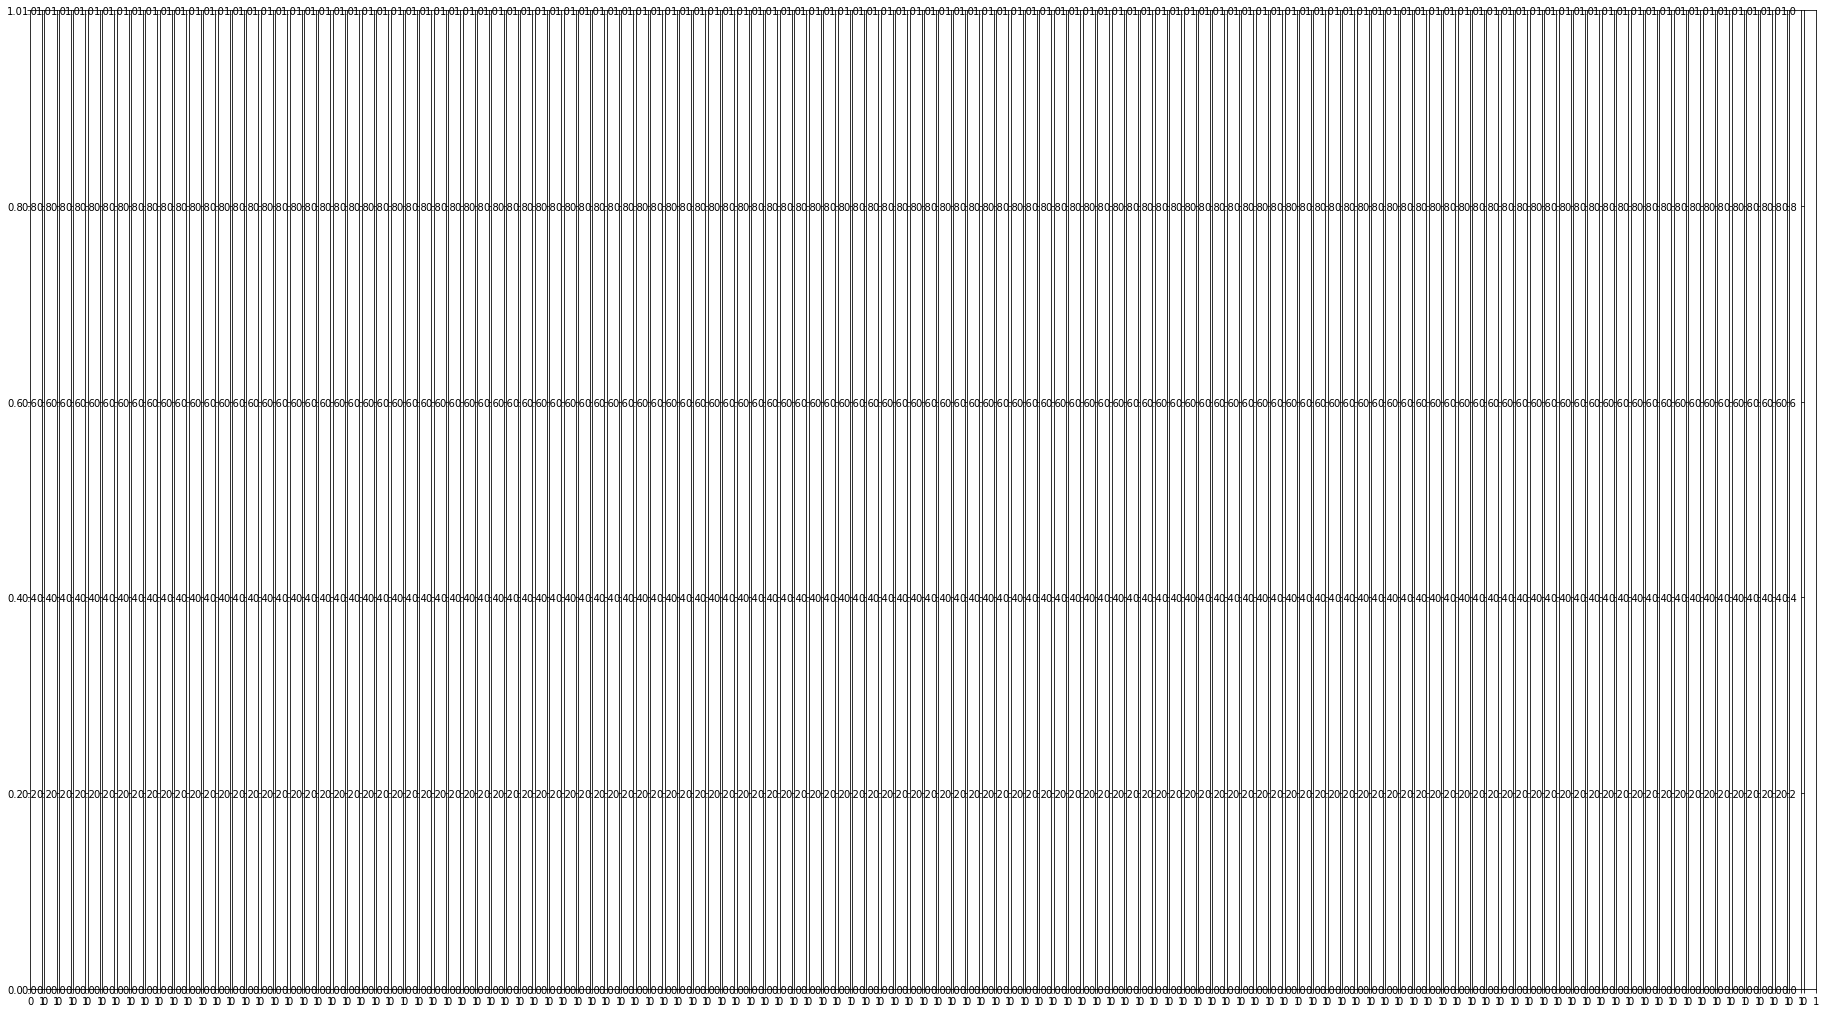

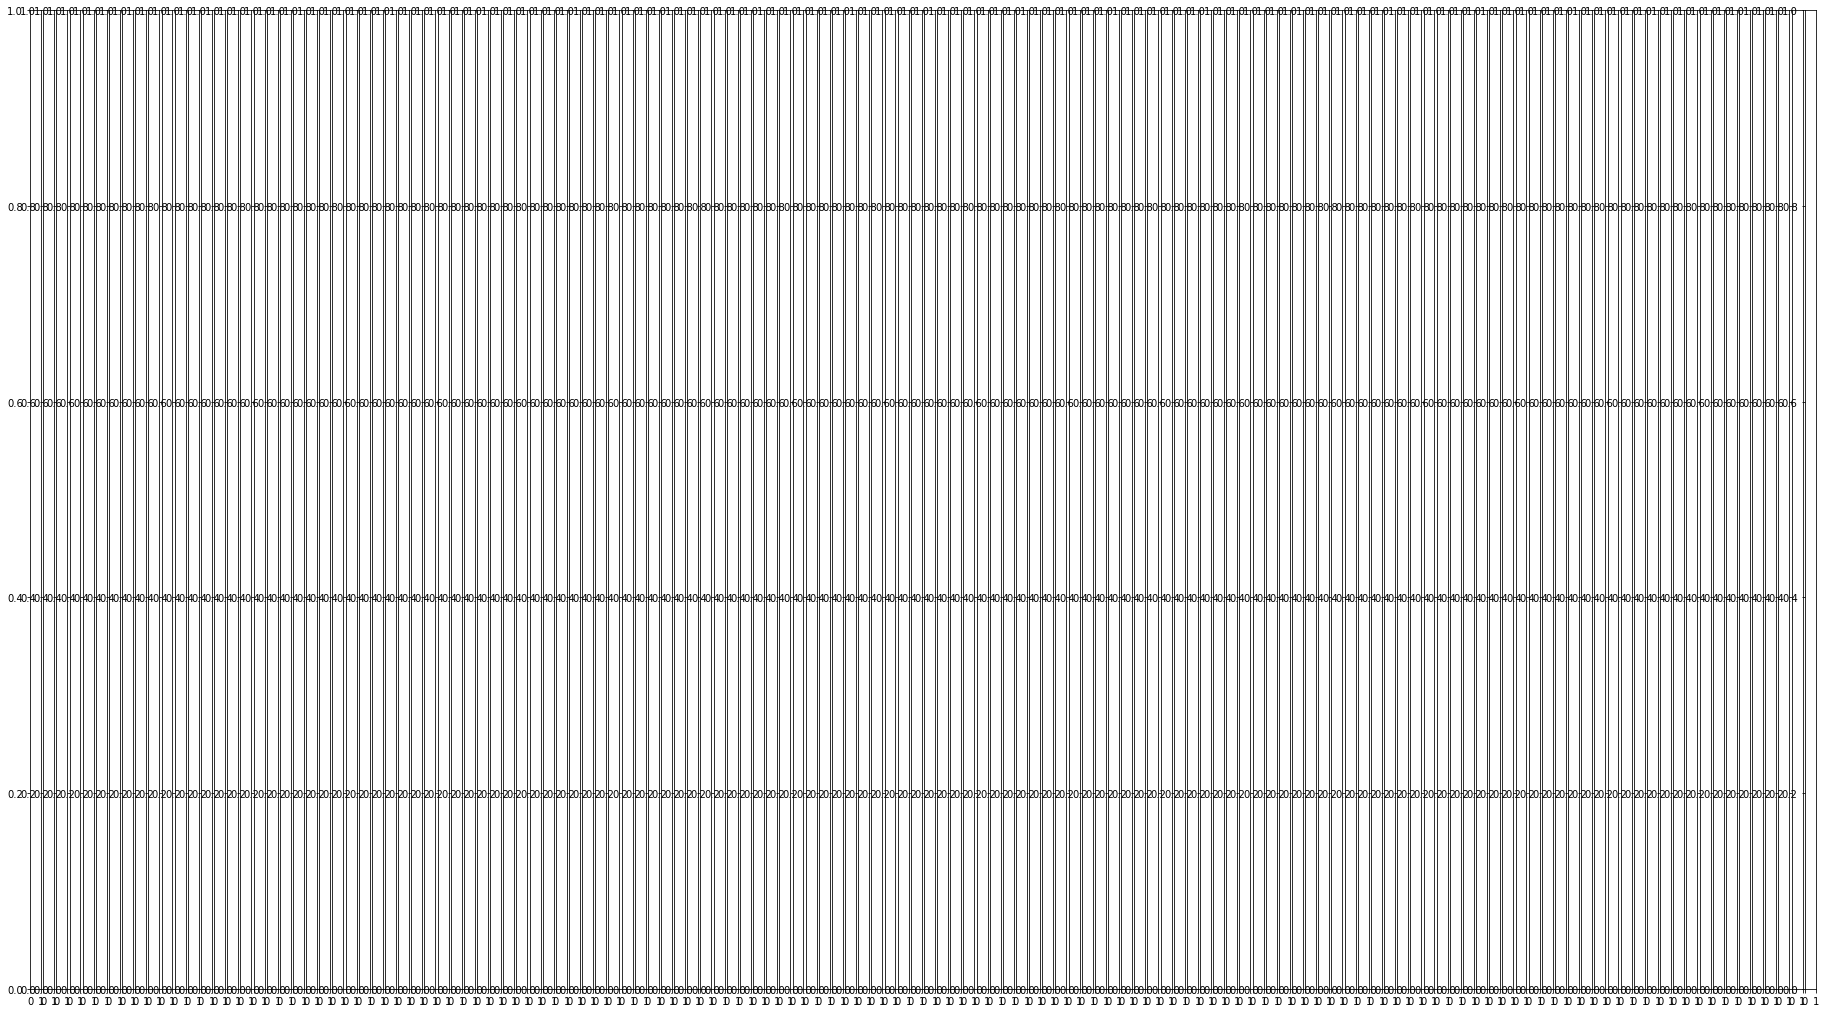

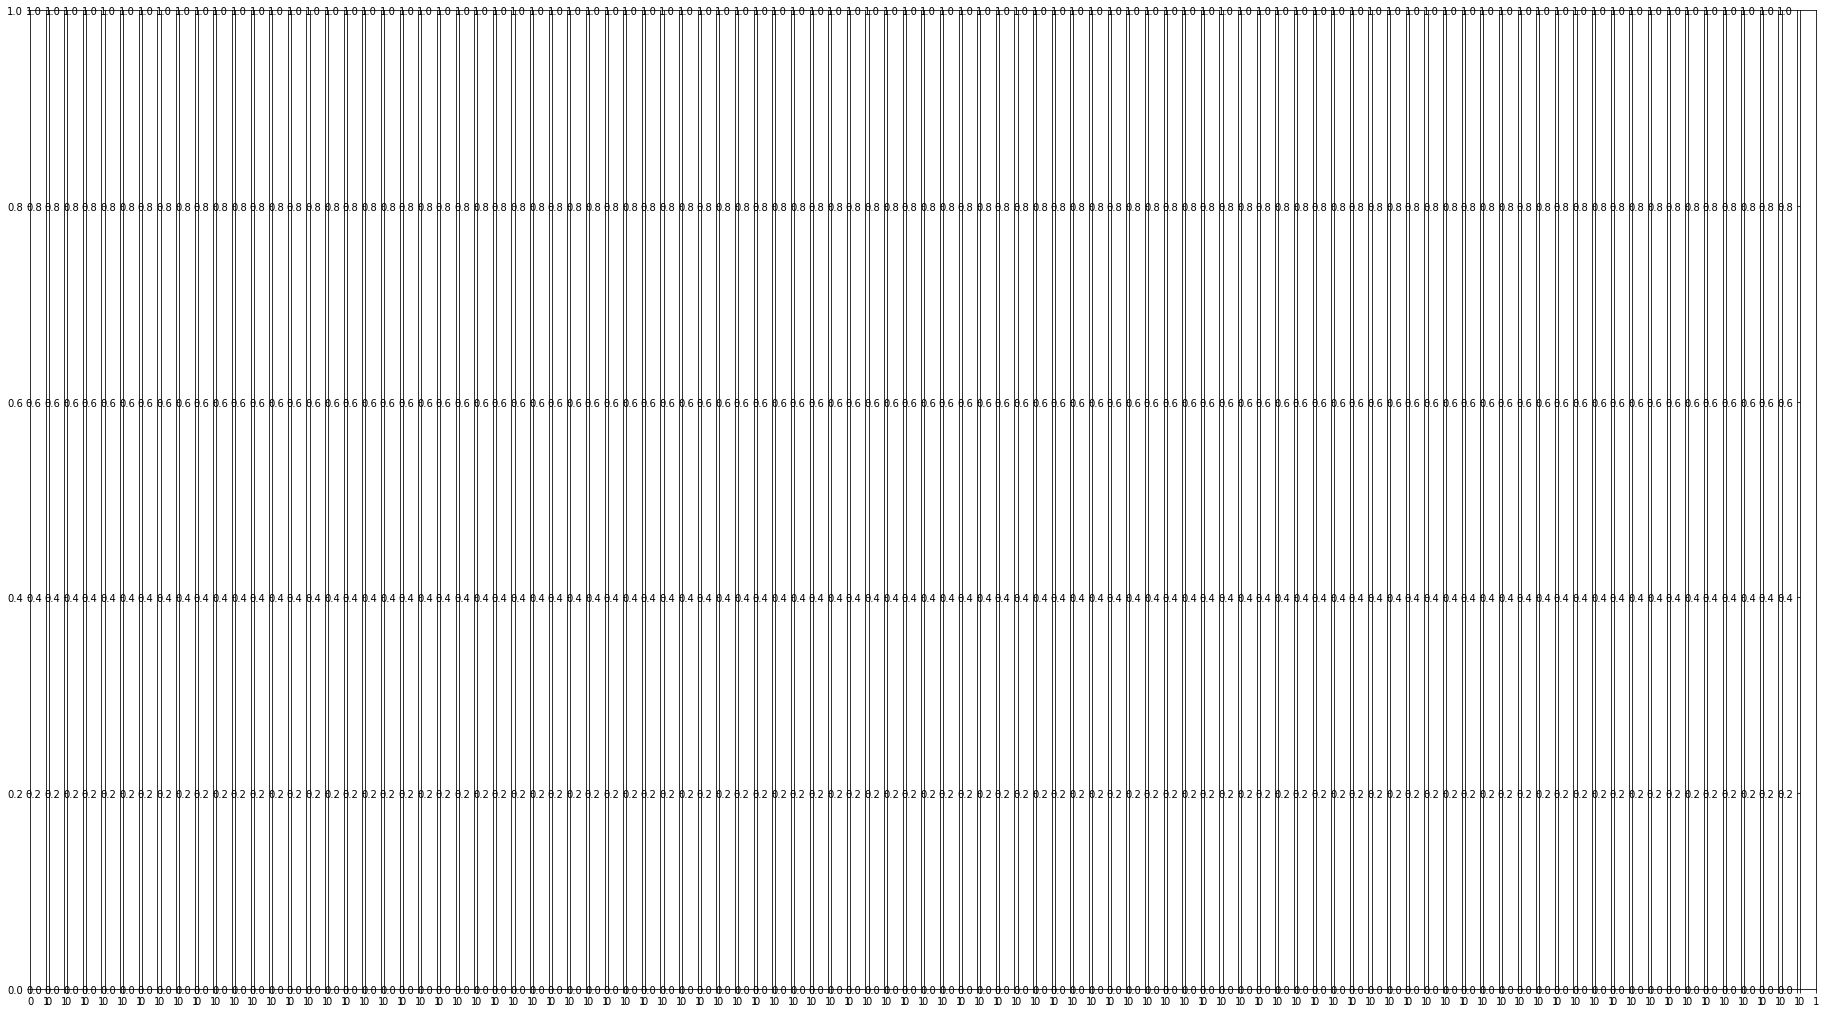

In [9]:
# For my static images:
folder_name = ["Left", "Right", "Under"]
# folder_name = ["Out"]
extension = [".png", ".jpg"]
rows = []
IMAGE_FILES = []

vdo = []

for name in folder_name:
  # IMAGE_FILES = glob.glob(f"/content/drive/Shareddrives/computer-vision/dataset/{name}/*.png")
  [IMAGE_FILES.extend(glob.glob(f"/content/drive/Shareddrives/computer-vision/dataset/{name}/*{e}")) for e in extension]
  folder_size = len(IMAGE_FILES)
  print(len(IMAGE_FILES))
  # print(folder_size)
  _, ax = plt.subplots(1, folder_size, figsize=(32, 18))

  BG_COLOR = (192, 192, 192) # gray
  with mp_pose.Pose(
      static_image_mode=True,
      model_complexity=2,
      enable_segmentation=True,
      min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES[:]):
      print(idx + 1, "/", folder_size, "from", name)
      image = cv2.imread(file)
      image_height, image_width, _ = image.shape
      # Convert the BGR image to RGB before processing.
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      if not results.pose_landmarks:
        continue
      # print(
      #     f'Nose coordinates: ('
      #     f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      #     f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
      # )

      # annotated_image = image.copy()
      # Draw segmentation on the image.
      # To improve segmentation around boundaries, consider applying a joint
      # bilateral filter to "results.segmentation_mask" with "image".
      # condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
      # bg_image = np.zeros(image.shape, dtype=np.uint8)
      # bg_image[:] = BG_COLOR
      # annotated_image = np.where(condition, annotated_image, bg_image)
      
      # plot image #################################################
      # annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
      # plt.imshow(annotated_image)
      # plt.show()
      
      # Draw pose landmarks on the image.
      # mp_drawing.draw_landmarks(
      #     annotated_image,
      #     results.pose_landmarks,
      #     mp_pose.POSE_CONNECTIONS,
      #     landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
      
      
      # ax[idx].imshow(annotated_image)
      # plt.imshow(annotated_image)
      # plt.show()
      
      # Plot pose world landmarks.
      # mp_drawing.plot_landmarks(
      #     results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

      # print(results.pose_world_landmarks)
      
      # image_landmarks2numpy(results.pose_world_landmarks.landmark, True)
      # vdo.append(results.pose_world_landmarks.landmark)

      # if (idx == 0):
      #   pass
      # else:
      #   print(f"Y average difference between frame {idx} and {idx+1}: " + str(get_landmarks_direction(vdo[idx-1], vdo[idx]) * 100))

    # direction = get_landmarks_direction(vdo[0], vdo[1])
    # direction = get_landmarks_direction(vdo[1], vdo[2])

    # plt.show()
    # for i in range(folder_size):
    #   if (i == 0):
    #     pass
    #   else:
    #     print(f"Y average difference between frame {i} and {i+1}: " + str(get_landmarks_direction(vdo[i-1], vdo[i]) * 100))

    # direction = get_landmarks_direction(vdo[4], vdo[5])
    # direction = get_landmarks_direction(vdo[4], vdo[5])


    # print(direction)

      row = []
      for landmark in results.pose_world_landmarks.landmark:
        # print(landmark)
        row.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
      row.append(name)
      rows.append(row)
  IMAGE_FILES = []

In [10]:
df = pd.DataFrame(rows, columns=columns)
df

,x0,y0,z0,visibility0,x1,y1,z1,visibility1,x2,y2,...,visibility30,x31,y31,z31,visibility31,x32,y32,z32,visibility32,label
0,0.017942,-0.614115,-0.324684,0.999968,0.037722,-0.631337,-0.311465,0.999891,0.039600,-0.629876,...,0.930736,0.085112,0.817557,0.238597,0.980941,-0.211197,0.758264,0.144318,0.983767,Left
1,0.018637,-0.597788,-0.349394,0.999958,0.037871,-0.617472,-0.340479,0.999868,0.040115,-0.616318,...,0.951576,0.063388,0.803196,0.240235,0.986386,-0.212848,0.745983,0.111291,0.991144,Left
2,0.027511,-0.590038,-0.358719,0.999983,0.047702,-0.608323,-0.347724,0.999946,0.050136,-0.606586,...,0.953628,0.076926,0.819616,0.234101,0.988808,-0.232068,0.750802,0.107644,0.991330,Left
3,0.018899,-0.588885,-0.414691,0.999972,0.037577,-0.606801,-0.404381,0.999909,0.038844,-0.604650,...,0.960613,0.064794,0.814373,0.287504,0.990622,-0.214760,0.761582,0.166752,0.991755,Left
4,0.020302,-0.588473,-0.325397,0.999945,0.036266,-0.606524,-0.313812,0.999814,0.038243,-0.604666,...,0.927588,0.064318,0.834513,0.212448,0.978343,-0.235896,0.775620,0.093858,0.984457,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.082629,-0.556225,-0.230945,0.999996,0.103516,-0.578811,-0.212227,0.999995,0.104357,-0.579933,...,0.941492,0.120937,0.417848,0.096842,0.988055,-0.093742,0.400960,0.079801,0.957604,Under
351,0.024288,-0.514790,-0.471134,0.999932,0.043179,-0.542101,-0.460262,0.999900,0.044990,-0.539001,...,0.945279,0.086099,0.418692,0.054756,0.985016,-0.129176,0.418426,0.025248,0.983459,Under
352,-0.107360,-0.442190,-0.518749,0.999925,-0.096188,-0.478548,-0.517810,0.999855,-0.094232,-0.475303,...,0.938743,0.146599,0.528439,-0.008251,0.984237,-0.133867,0.493709,-0.018131,0.976232,Under
353,-0.102821,-0.399695,-0.535261,0.999999,-0.086363,-0.436426,-0.531507,0.999999,-0.085264,-0.433905,...,0.374504,0.220689,0.417742,0.077062,0.366292,-0.080990,0.375593,0.124713,0.248728,Under


In [11]:
os.chdir('/content/drive/Shareddrives/computer-vision/')
f = open("landmarks_fixed.csv", "w")
f.write(df.to_csv())
f.close()